### Digital Image
- 2dimension
- bitmap image
- 좌표는 (x(col), y(row)), 행렬은 (r(row), c(col))로 표현
- 픽셀 값 접근은 행렬을 이용
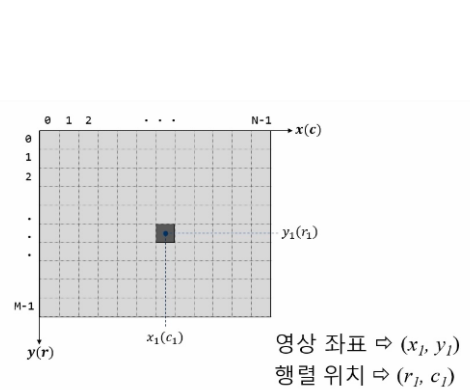

#### Binary Image
- pixel당 1bit(0/1)로 표현
- threshold를 이용하여 binary로 변환
- 밝기의 경우 밀도를 조절하여 표현 ( dithering)

#### Grayscale Image
- pixel당 8bit(0~255)로 표현


#### Color Image
- pixel당 24bit(0~255 x 3channel(BGR))

### Color-space

#### RGB
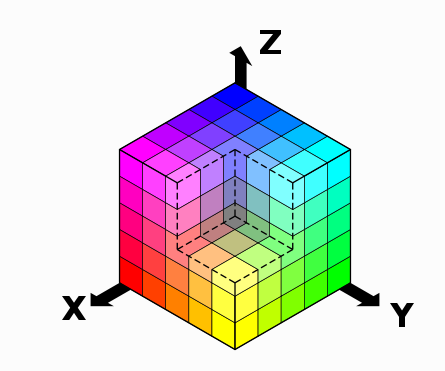

### HSV
- H : Hue, 색상. 각도로 표현 됨 [0,179]
- S : Saturation, 채도. 중심에서 바깥쪽으로 갈수록 높음 [0,255]
- V : Value, 명도. 수직축의 깊이 [0,255]
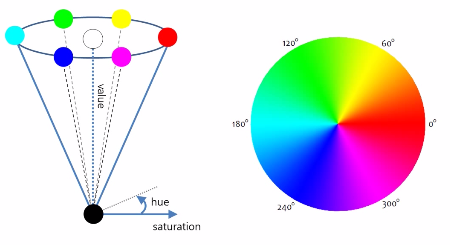

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

---
### Color-space 변환
#### cv2.cvtColor(src, code)
- BGR -> Gray : cv2.COLOR_BGR2GRAY
- BGR -> HSV : cv2.COLOR_BGR2HSV

In [3]:
# 변환 flag
color_flag = [i for i in dir(cv2) if i.startswith("COLOR_")]
print(color_flag)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

---
#### blue 영역을 찾는 예제

In [36]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if ret:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        lower_blue = np.array([0, 0, 0])
        upper_blue = np.array([50, 100, 100])
        
        mask = cv2.inRange(hsv, lower_blue, upper_blue)

        #bit연산자를 통해서 mask 영역만 남김.
        res = cv2.bitwise_and(frame, frame, mask = mask)

        cv2.imshow('frame', frame)
        cv2.imshow('mask', mask)
        cv2.imshow('res', res)

    if cv2.waitKey(33) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

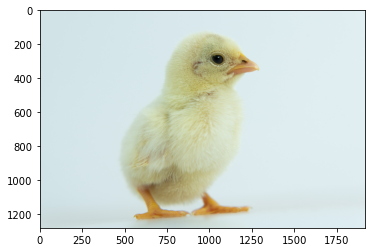

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image.jpg')
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])

plt.imshow(img)
plt.show()

In [40]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(hsv_img[400,800])

[ 87  69 201]


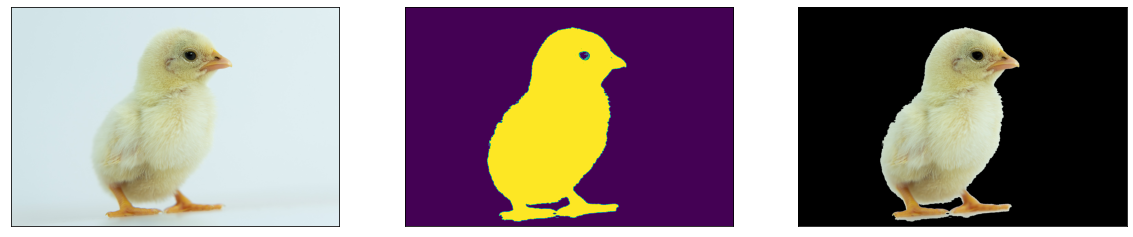

In [52]:
hsv_lower = np.array([60, 10, 30])
hsv_upper = np.array([180, 255, 255])

mask = cv2.inRange(hsv_img, hsv_lower, hsv_upper)
res = cv2.bitwise_and(img, img, mask = mask)
plt.figure(figsize = (20,12))
plt.subplot(131);plt.xticks([]);plt.yticks([]);plt.imshow(img)
plt.subplot(132);plt.xticks([]);plt.yticks([]);plt.imshow(mask)
plt.subplot(133);plt.xticks([]);plt.yticks([]);plt.imshow(res)